In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

from cplAE_TE.utils.load_helpers import get_paths, load_dataset
from cplAE_TE.utils.tree_helpers import HTree, simplify_tree

%matplotlib inline

In [2]:
path = get_paths(warn=False,write_toml=False)

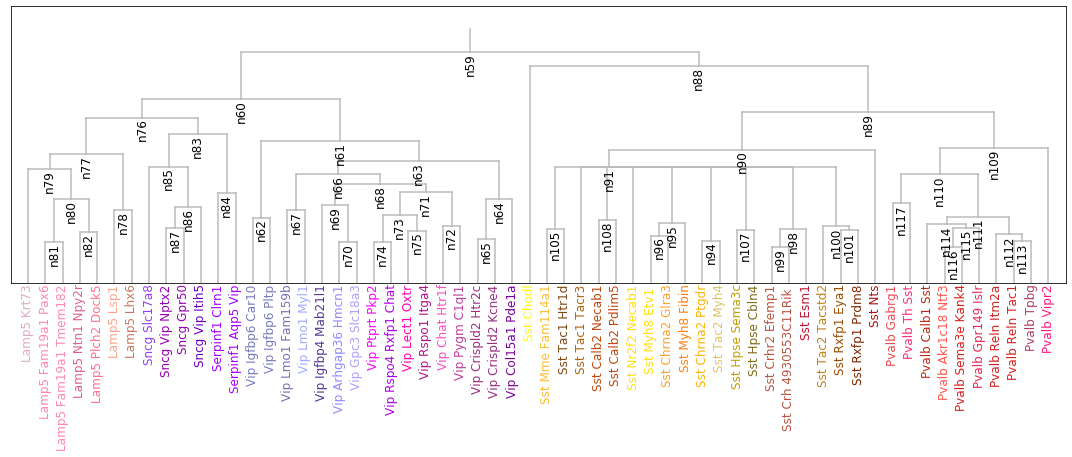

In [3]:
#Get inhibitory tree
htree = HTree(htree_file=path['htree'])
subtree = htree.get_subtree(node='n59')
subtree.plot((15,5),fontsize=12)

#Get list of cell types that is well-sampled
dataset = load_dataset(min_sample_thr=10)
kept_classes = dataset['well_sampled_sorted_t_types'].tolist()

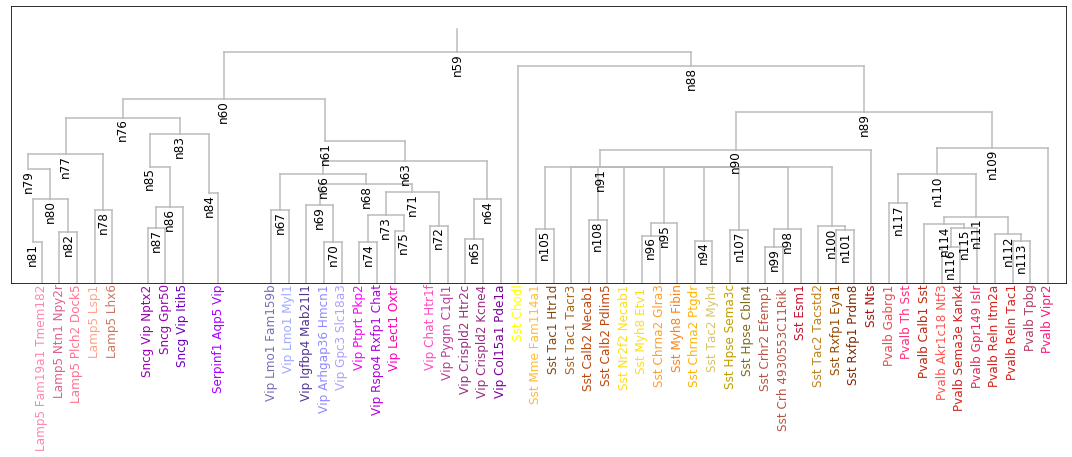

In [4]:
#Obtain all relevant ancestor nodes:
kept_tree_nodes=[]
for node in kept_classes:
    kept_tree_nodes.extend(subtree.get_ancestors(node))
    kept_tree_nodes.extend([node])

kept_subtree_df = subtree.obj2df()
kept_subtree_df = kept_subtree_df[kept_subtree_df['child'].isin(kept_tree_nodes)]

#Plot tree with kept_classes:
kept_subtree = HTree(htree_df=kept_subtree_df)
kept_subtree.plot((15,5),fontsize=12)
plt.show()

Remove n85 and link ['n83'] to ['n86']
Remove n61 and link ['n60'] to ['n63']
Remove n75 and link ['n73'] to ['Vip Lect1 Oxtr']
Remove n79 and link ['n77'] to ['n80']
Remove n84 and link ['n83'] to ['Serpinf1 Aqp5 Vip']
Remove n81 and link ['n80'] to ['Lamp5 Fam19a1 Tmem182']


---- Simplified tree: ----


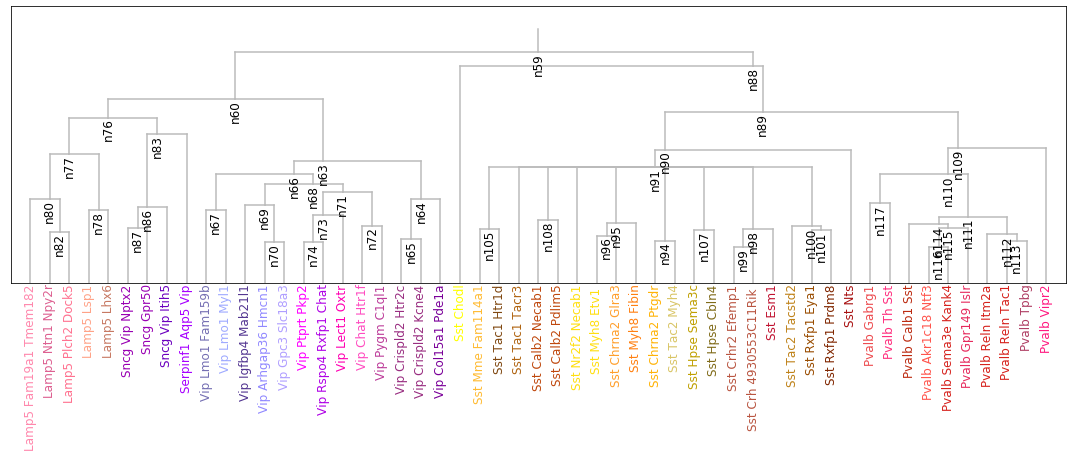

In [5]:
mod_subtree,_ = simplify_tree(kept_subtree,skip_nodes=None)
mod_subtree.update_layout()
print('\n\n---- Simplified tree: ----')
mod_subtree.plot((15,5),fontsize=12)
plt.show()